# **SUBMITTED BY -**

SAURABH MEHRA(23EC65R06)

ANSHU PAL(23EC65R04)

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [7]:
!mkdir downloads
!mkdir data

mkdir: cannot create directory ‘downloads’: File exists
mkdir: cannot create directory ‘data’: File exists


In [8]:
import requests
import re

url = "https://vision.middlebury.edu/stereo/data/scenes2005/ThirdSize/zip-2views/"
req = requests.get(url)
html = req.text

# split and filter
file_url_list = [x for x in re.findall(r'"(.*?)"', req.text) if (".zip" in x) and ("ALL" not in x)]

# Write URLs to a text file
with open("urls.txt", "w") as file:
    for url in file_url_list:
        file.write(url + "\n")

print("URLs written to urls.txt")


['Art-2views-3illum-3exp.zip', 'Art-2views.zip', 'Books-2views-3illum-3exp.zip', 'Books-2views.zip', 'Computer-2views-3illum-3exp.zip', 'Computer-2views.zip', 'Dolls-2views-3illum-3exp.zip', 'Dolls-2views.zip', 'Drumsticks-2views-3illum-3exp.zip', 'Drumsticks-2views.zip', 'Dwarves-2views-3illum-3exp.zip', 'Dwarves-2views.zip', 'Laundry-2views-3illum-3exp.zip', 'Laundry-2views.zip', 'Moebius-2views-3illum-3exp.zip', 'Moebius-2views.zip', 'Reindeer-2views-3illum-3exp.zip', 'Reindeer-2views.zip']


In [9]:
import requests
import re
import os
from zipfile import ZipFile

url = "https://vision.middlebury.edu/stereo/data/scenes2005/ThirdSize/zip-2views/"
req = requests.get(url)
html = req.text

# Split and filter URLs
file_url_list = [x for x in re.findall(r'"(.*?)"', req.text) if (".zip" in x) and ("ALL" not in x)]

# Create directories for downloads and data
download_dir = "./downloads/"
data_dir = "./data/"
os.makedirs(download_dir, exist_ok=True)
os.makedirs(data_dir, exist_ok=True)

# Download and extract files
for file in file_url_list:
    file_name = file.split("/")[-1]
    # Download file
    with open(os.path.join(download_dir, file_name), "wb") as f:
        response = requests.get(url + file)
        f.write(response.content)

    # Extract file
    with ZipFile(os.path.join(download_dir, file_name), 'r') as zip_ref:
        zip_ref.extractall(data_dir)

print("Files downloaded and extracted successfully.")


In [11]:
def get_strip(img, row, height):
  return img[row:row+height,:]


def SSD(win1, win2):
  return np.sum((win1-win2)**2)

def ZMCC(win1, win2):
  mean_win1 = np.mean(win1)
  mean_win2 = np.mean(win2)

  std_win1 = np.std(win1)
  std_win2 = np.std(win2)

  n_win1 = (win1 - mean_win1)
  n_win2 = (win1 - mean_win2)

  s = np.sum(np.multiply(n_win1, n_win2))

  return -1*s/(std_win1*std_win2 + 1e-10)

def get_minimum(window, strip, win_loc, loss_fn):
  w = window.shape[1]
  losses = [loss_fn(window, strip[:, i:i+w])
            for i in range(win_loc)]

  return np.argmin(losses) - win_loc

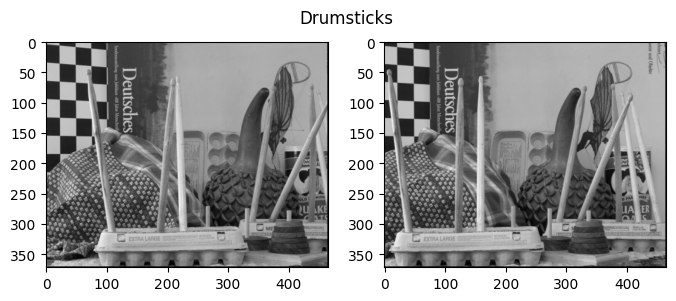

0
25
50


In [ ]:
base_dir = "./data/"
dir_names = set([x.split("-")[0] for x in file_url_list])
view_names =  [F"view{x}.png" for x in [1,5]]

# window_size = 5

for dir in dir_names:
  for loss_fn in [ZMCC, SSD]:
    for window_size in [3,5,15]:
      views = [cv.imread(F"{base_dir}{dir}/{view_name}")
                        for view_name in view_names]

      h, w = views[0].shape[:2]
      disp = np.zeros((h,w))
      views = [np.pad(cv.cvtColor(view, cv.COLOR_BGR2GRAY),
                      window_size//2) for view in views]
      gt = cv.imread(F"{base_dir}{dir}/disp1.png")
      fig, ax = plt.subplots(1,2, figsize=(8,3))
      ax[0].imshow(views[0], cmap="gray")
      ax[1].imshow(views[1], cmap="gray")
      fig.suptitle(dir)
      plt.show()

      for i in range(h):
        if (i%25==0):
          print(i)
        for j in range(window_size, w):

          window = views[0][i:i+window_size, j:j+window_size]
          strip = views[1][i:i+window_size, :]
          disp[i,j] = get_minimum(window, strip, j, loss_fn)
      print("loss fn", loss_fn)
      print("window", window_size)
      plt.imshow(disp, cmap="gray")
      plt.show()


      # if str(type(gt)) != "object":
      #   plt.imshow(gt, cmap="gray")
      #   plt.show()
